In [1]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import pathlib 
import numpy as np
import os
import json

In [2]:
image_size = 224
batch_size = 32
channels = 3

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_ds = train_datagen.flow_from_directory(directory = '../input/100-bird-species/train',
                                               batch_size= batch_size,
                                               target_size= (image_size,image_size),
                                               class_mode = "categorical")

test_ds = test_datagen.flow_from_directory(directory = '../input/100-bird-species/test',
                                               batch_size = batch_size,
                                               target_size = (image_size,image_size),
                                               class_mode = "categorical")

val_ds = valid_datagen.flow_from_directory(directory = '../input/100-bird-species/valid',
                                               batch_size = batch_size,
                                               target_size = (image_size,image_size),
                                               class_mode = "categorical")


Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


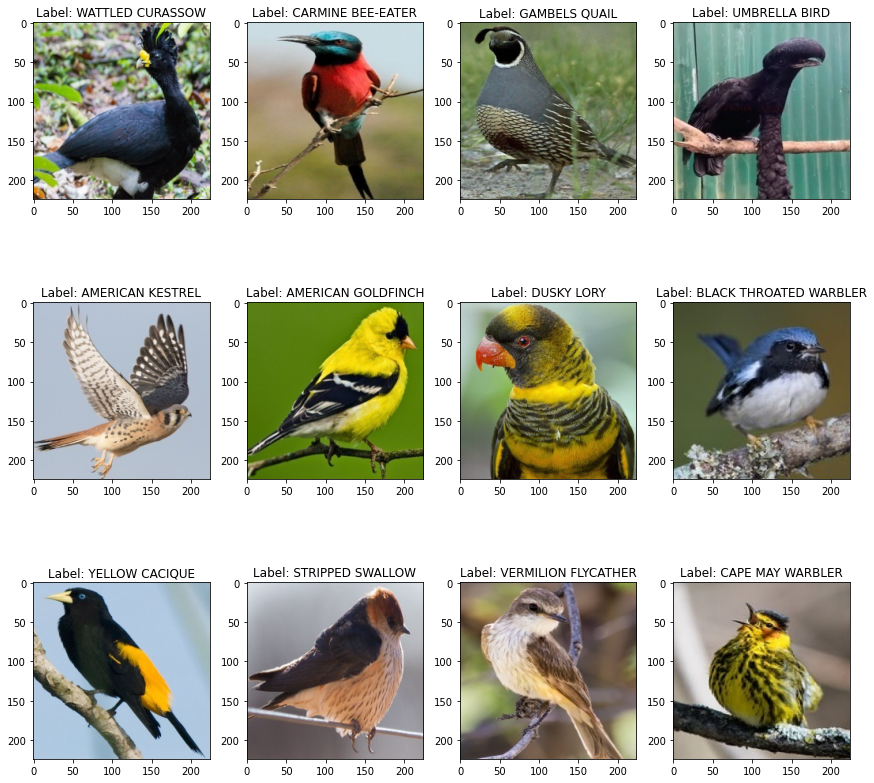

In [4]:
dir = '../input/100-bird-species/train/'
dirnames = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
num_image = 12
num_row = 3
num_col = 4

# plot images

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,4*num_row))

for j,i in enumerate(dirnames[:num_image]):
    ax = axes[j//num_col, j%num_col]
    file = dir + i + '/'+ os.listdir(dir+i)[0]
    image = mpimg.imread(file)
    ax.imshow(image)
    ax.set_title('Label: {}'.format(i))
plt.tight_layout()
plt.show()

In [5]:
len(train_ds)

1825

In [6]:
len(test_ds)

63

In [7]:
len(val_ds)

63

In [8]:
data_dir = pathlib.Path("/kaggle/input/100-bird-species/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
print(class_names)

['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'ALBATROSS' 'ALBERTS TOWHEE'
 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH' 'ALTAMIRA YELLOWTHROAT'
 'AMERICAN AVOCET' 'AMERICAN BITTERN' 'AMERICAN COOT' 'AMERICAN GOLDFINCH'
 'AMERICAN KESTREL' 'AMERICAN PIPIT' 'AMERICAN REDSTART'
 'AMETHYST WOODSTAR' 'ANDEAN GOOSE' 'ANDEAN LAPWING' 'ANDEAN SISKIN'
 'ANHINGA' 'ANIANIAU' 'ANNAS HUMMINGBIRD' 'ANTBIRD' 'ANTILLEAN EUPHONIA'
 'APAPANE' 'APOSTLEBIRD' 'ARARIPE MANAKIN' 'ASHY THRUSHBIRD'
 'ASIAN CRESTED IBIS' 'AVADAVAT' 'AZURE JAY' 'AZURE TANAGER' 'AZURE TIT'
 'BAIKAL TEAL' 'BALD EAGLE' 'BALD IBIS' 'BALI STARLING' 'BALTIMORE ORIOLE'
 'BANANAQUIT' 'BAND TAILED GUAN' 'BANDED BROADBILL' 'BANDED PITA'
 'BANDED STILT' 'BAR-TAILED GODWIT' 'BARN OWL' 'BARN SWALLOW'
 'BARRED PUFFBIRD' 'BARROWS GOLDENEYE' 'BAY-BREASTED WARBLER'
 'BEARDED BARBET' 'BEARDED BELLBIRD' 'BEARDED REEDLING'
 'BELTED KINGFISHE

In [9]:
list = class_names.tolist()
json_object = json.dumps(list)
with open("list.json", "w") as outfile:
    outfile.write(json_object)

In [10]:
base_model = tf.keras.applications.InceptionV3(include_top= False,)

base_model.trainable = False


2022-09-01 10:36:49.779724: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-01 10:36:49.878395: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-01 10:36:49.879162: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-01 10:36:49.880510: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

87924736/87910968 [==============================] - 1s 0us/step


In [11]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [12]:
#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(224,224,3), name = "input-layer")

#5. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(400, activation = "softmax", name = "output-layer")(x)

# 8. Combine the inputs with outputs into a model
model = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])

Shape after passing inputs through base model: (None, 5, 5, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)


In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input-layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
global_average_pooling_layer (None, 2048)              0         
_________________________________________________________________
output-layer (Dense)         (None, 400)               819600    
Total params: 22,622,384
Trainable params: 819,600
Non-trainable params: 21,802,784
_________________________________________________________________


In [14]:
history = model.fit(train_ds,
                                 epochs=10,
                                 steps_per_epoch = len(train_ds),
                                 validation_data = val_ds,
                                 validation_steps = int(0.25*len(val_ds)),)

2022-09-01 10:36:56.972471: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-09-01 10:37:01.919878: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1825/1825 [==============================] - 433s 231ms/step - loss: 8.6168 - accuracy: 0.5036 - val_loss: 5.8015 - val_accuracy: 0.6917
Epoch 2/10
1825/1825 [==============================] - 170s 93ms/step - loss: 5.9241 - accuracy: 0.6953 - val_loss: 4.5090 - val_accuracy: 0.7542
Epoch 3/10
1825/1825 [==============================] - 180s 98ms/step - loss: 4.9103 - accuracy: 0.7596 - val_loss: 4.8897 - val_accuracy: 0.7542
Epoch 4/10
1825/1825 [==============================] - 175s 96ms/step - loss: 4.3848 - accuracy: 0.7929 - val_loss: 3.9258 - val_accuracy: 0.8042
Epoch 5/10
1825/1825 [==============================] - 171s 94ms/step - loss: 3.7897 - accuracy: 0.8219 - val_loss: 4.4252 - val_accuracy: 0.8354
Epoch 6/10
1825/1825 [==============================] - 172s 94ms/step - loss: 3.3781 - accuracy: 0.8423 - val_loss: 4.2478 - val_accuracy: 0.8354
Epoch 7/10
1825/1825 [==============================] - 164s 90ms/step - loss: 3.0166 - accuracy: 0.8578 - val_loss: 5.4752 - va

In [15]:
data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),]
)

In [16]:
model.save('./')

2022-09-01 11:10:38.561956: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


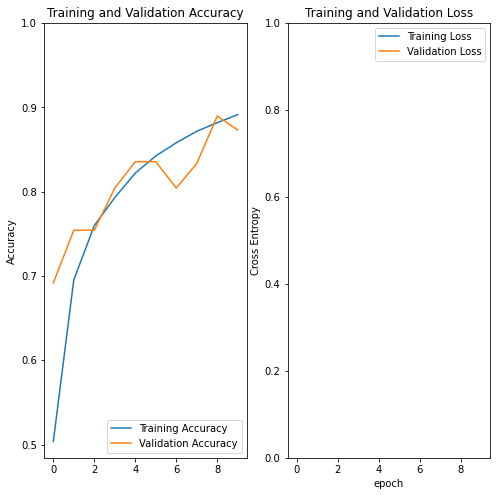

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [18]:
model.evaluate(test_ds)

63/63 [==============================] - 19s 300ms/step - loss: 4.2705 - accuracy: 0.8480


[4.270492076873779, 0.8479999899864197]

In [19]:
model1 = keras.models.load_model('../input/100-bird-species-with-98-24-accuracy') 

In [20]:
from keras.preprocessing.image import load_img
# load the image
img = load_img('../input/bird-image/e102_1_medium.png')
# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image

narray = np.array(img)
narray.shape

<class 'PIL.PngImagePlugin.PngImageFile'>
PNG
RGB
(1000, 487)


(487, 1000, 3)

In [32]:
def load_and_prep_image(filename):
    img = load_img(filename)
    narray = np.array(img)
    size = (224, 224)
    image = tf.image.resize(img, (size)) / 255.0
    img_array = tf.expand_dims(image, 0)
    return image


In [33]:
size = (224, 224)
image = tf.image.resize(img, (size)) / 255.0
image.shape

img_array = tf.expand_dims(image, 0)
img_array


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.05652136, 0.10750175, 0.13103116],
         [0.05522006, 0.10912115, 0.12720604],
         [0.05574027, 0.10750175, 0.12318803],
         ...,
         [0.0416162 , 0.12941177, 0.12341968],
         [0.03921569, 0.12580827, 0.11981513],
         [0.0346774 , 0.12443967, 0.11087266]],

        [[0.04799545, 0.09897584, 0.12642682],
         [0.04482653, 0.09897584, 0.12010663],
         [0.04399776, 0.10393298, 0.11764706],
         ...,
         [0.03921569, 0.1254902 , 0.11858369],
         [0.03623074, 0.12490392, 0.11541478],
         [0.03529412, 0.12305397, 0.11154016]],

        [[0.04320525, 0.09418564, 0.12156863],
         [0.03931541, 0.09365106, 0.11769692],
         [0.0328708 , 0.0943715 , 0.11005777],
         ...,
         [0.03529412, 0.12041032, 0.10989005],
         [0.03452388, 0.12471996, 0.10882968],
         [0.03529412, 0.122737  , 0.11615684]],

        ...,

        [[0.01692254, 0.05875554, 

In [34]:
prediction = model1.predict(img_array)

In [35]:
prediction
np.argmax(prediction)

48

In [36]:
class_names[48]

'BARN OWL'

In [37]:
def pred_and_plot(model, filename, class_names):

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

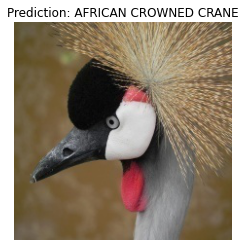

In [38]:
pred_and_plot(model1,"/kaggle/input/100-bird-species/images to test/14.jpg", class_names)

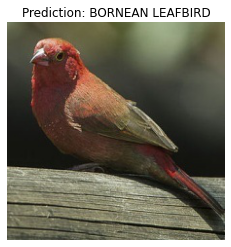

In [39]:
pred_and_plot(model, "/kaggle/input/100-bird-species/images to test/1.jpg", class_names)

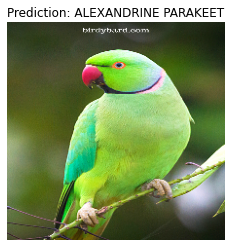

In [40]:
pred_and_plot(model, "../input/bird-image/parrot.png", class_names)